In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import cv2


In [96]:
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('thermal_200.avi', fourcc, 10, (34,17))
# out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (34,17))

[ WARN:0@5268.921] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_6619b6c0-9e55-4b45-8c01-8e72c5c42b371vrd3g4u/croots/recipe/opencv-suite_1656606585275/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements


In [4]:
with open('raw_GateCounting_1_CTS000850_201006172744_0.txt', 'r') as file:
    data = file.readlines()

if data[0] < data[len(data) - 1]:
    data = data[2:]

with open('thermal_video.txt', 'w') as file:
    file.writelines( data )



In [14]:
df = pd.read_table('thermal_video.txt', delimiter="\t", header=None)

df = df.iloc[:,0:595]
print(df.shape)

max_cols = df.max()
print(max_cols.max())

cmap = plt.cm.jet

(1270, 595)
33.458


In [35]:
def normData(arr, t_min, t_max):
    return (arr-t_min)/(t_max-t_min)

In [97]:
from numpy import uint8


temp_row = []
for row in range(0,200):
    pixel_row = 0
    pixel_col = 0
    temp_img = pd.DataFrame(index=range(17),columns=range(34))
    for col in range(0,df.shape[1]):
        if pixel_col < 34:
            temp_img.iloc[[pixel_row],[pixel_col]] = df.iloc[[row],[col]]
            temp_img.iloc[[pixel_row],[pixel_col]] = temp_img.iloc[[pixel_row],[pixel_col]].astype(float)
            pixel_col += 1
        else:
            pixel_col = 0
            pixel_row += 1

    temp_img = temp_img.replace(to_replace=np.nan, value='23.848')
    temp_img = temp_img.astype(float)

    np_image = np.array(temp_img, dtype=uint8)
    
    # for i in range(0, np_image.shape[0]):
    #     np_image[i] = normData(np_image[i], 20.0, 32.0)

    # image = np_image*255.0
    # image = image.astype(uint8)

    # norm = np.linalg.norm(np_image)
    # norm_image = np_image/norm
    # image = norm_image*1000
    # image = image.astype('uint8')

    scaler = MinMaxScaler(feature_range=(0,255))
    # scaler = MinMaxScaler()
    # scaler = StandardScaler()
    model = scaler.fit(np_image)
    image = model.transform(np_image)
    # image = np.concatenate((image, image, image), axis=1)
    # print("image size: ", image.shape)
    

    # norm = plt.Normalize(vmin=20, vmax=33)
    # image = cmap(norm(np_image))*255.0
    # print("post norm size: ", image.shape)
    image = image.astype(uint8)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # image = np_image*255

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    # # print("image size: ", image.shape)

    out.write(image)

out.release()



(17, 34, 4)
0
0


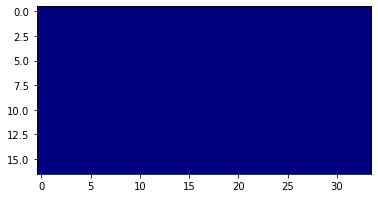

In [39]:
cmap = plt.cm.jet
norm = plt.Normalize(vmin=20, vmax=33)
image = cmap(norm(np_image))

print(image.shape) 

print(np_image.min())
print(np_image.max())

plt.imshow(image)

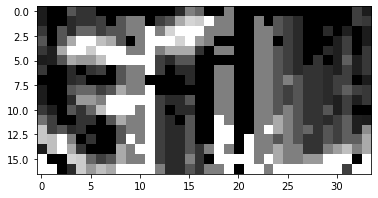

In [86]:
plt.imshow(image)

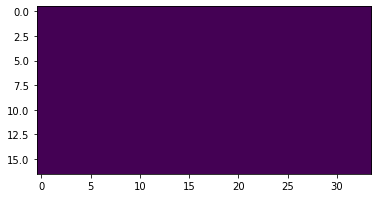

1270

np_image